---
title: 4.6 Least Squares and Data Fitting
subject:  Orthogonality
subtitle: model some observed data
short_title: 4.6 Least Squares and Data Fitting
authors:
  - name: Nikolai Matni
    affiliations:
      - Dept. of Electrical and Systems Engineering
      - University of Pennsylvania
    email: nmatni@seas.upenn.edu
license: CC-BY-4.0
keywords: Data, Model parameterization, Minimum Mean Square Error, Regression
math:
  '\vv': '\mathbf{#1}'
  '\bm': '\begin{bmatrix}'
  '\em': '\end{bmatrix}'
  '\R': '\mathbb{R}'
---

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikolaimatni/ese-2030/HEAD?labpath=/03_Ch_4_Orthogonality/056-least_squares_data.ipynb)

{doc}`Lecture notes <../lecture_notes/Lecture 09 - Least Squares Data Fitting.pdf>`

## Reading

Material related to this page, as well as additional exercises, can be found in VMLS 13.

## Learning Objectives

By the end of this page, you should know:
- what a data fitting problem is and how it relates to least squares
- model parameterization and examples of different parameterizations
- the Minimum Mean Squared Error (MMSE)
- the regression model and one of its application (auto-regressive model for time-series modeling)
- the standard tricks for model selection: generalization and validation  

## Introduction

We will introduce one of the most important applications of least squares methods: fitting a mathematical model to some relation given some observed data.

A typical data fitting problem takes the following form: There is some underlying _feature vector or independent variable_ $\vv x \in \mathbb{R}^m$ and a scalar _outcome or response variable_ $y \in \mathbb{R}$ that we believe are (approximately) related by some function $f: \mathbb{R}^m \to \mathbb{R}$ such that

\begin{equation}
\label{y_app_f}
y \approx f(x).  \qquad \text{(M)}
\end{equation}

### Data

Our goal is to fit (or learn) a _model_ $f$ given some _data_:

$$
(\vv x^{(1)}, y^{(1)}), (\vv x^{(2)}, y^{(2)}), \ldots, (\vv x^{(N)}, y^{(N)}).
$$

These _data pairs_ $(\vv x^{(i)}, y^{(i)})$ are sometimes also called _observations, examples, samples, or measurements_ depending on context.

:::{note}
The superscript $^{(i)}$ denotes the $i$-th data point. For example, ${\vv x^{(i)} \in \mathbb{R}^m}$ is the $i^{th}$ independent variable, and $x_j^{(i)}$ is the value of $j^{th}$ feature for example $i$.
:::

### Model Parameterization

Our goal is to choose a model $\hat{f}: \mathbb{R}^m \to \mathbb{R}$ that approximates the [model](#y_app_f) well, that is, $y \approx \hat{f}(x)$. The hat notation is traditionally used to highlight that $\hat{f}$ is an approximation to $f$. Specifically, we will write $\hat{y} = \hat{f}(x)$ to highlight that $\hat{y}$ is an approximate prediction of the outcome $y$.

In order to efficiently search over candidate model functions $\hat{f}$, we need to _parameterize a model class $\mathcal{F}$_ that is easy to work with. A powerful and commonly used model class is the set of _linear in the parameters_ models of the form

\begin{equation}
\label{LP_eqn}
\hat{f}(\vv x) = \theta_1 f_1(\vv x) + \theta_2 f_2(\vv x) + \cdots + \theta_p f_p(\vv x). \qquad \text{(LP)} 
\end{equation}

In [(LP)](#LP_eqn), the functions $f_i: \mathbb{R}^m \to \mathbb{R}$ are _basis functions_ or _features_ that we choose before hand. 

:::{warning}
Note that the term basis here is related to, but different from, our [previous use](../01_Ch_2_Vector_Spaces_and_Bases/034-basis_dim.ipynb#basis_defn) of the term. 
:::

When we solve the data fitting problem, we will look for the _parameters_ $\theta_i$ that, among other things, make the model prediction $\hat{y}_i = \hat{f}(\vv x^{(i)})$ **consistent with the observed data**, i.e., we want $y^{(i)} \approx y^{(i)}$.

### Data fitting:

For the $i$-th observation $y^{(i)}$ and the $i^{th}$ prediction $\hat{y}^{(i)}$, we define the _prediction error_ or _residual_ $r^{(i)} = \hat{y}^{(i)} - y^{(i)}$.

The _least squares data fitting problem_ chooses the model parameters $\theta_i$ that minimize the (average of the) sum of the squares of the prediction errors on the data set:

$$
\frac{(r^{(1)})^2 + \cdots + (r^{(N)})^2}{N}
$$

Next we'll show that this problem can be cast as a least squares problem over the model parameters $\theta_i$. Before doing that though, we want to highlight the conceptual shift we are making.

:::{important} DATA-DRIVEN
Rather than hand crafting our function $\hat{f}$ from scratch, we **solve an optimization problem** to identify the parameters $\theta_i$ that best explain the data, i.e., we _learn_ the model from from the data. Of course, if we know something about the model structure, we should encode this in our choice of feature functions $f_i$. We'll see examples of such _feature engineering_ later.
:::

## Data Fitting as Least Squares

We start by stacking the outcomes $y^{(i)}$, predictions $\hat{y}^{(i)}$, and residuals $r^{(i)}$ as vectors in $\mathbb{R}^N$:

$$
\vv y = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(N)} \end{bmatrix}, \quad 
\hat{\vv y} = \begin{bmatrix} \hat{y}^{(1)} \\ \hat{y}^{(2)} \\ \vdots \\ \hat{y}^{(N)} \end{bmatrix}, \quad 
\vv r = \begin{bmatrix} r^{(1)} \\ r^{(2)} \\ \vdots \\ r^{(N)} \end{bmatrix} = \begin{bmatrix} y^{(1)} - \hat{y}^{(1)} \\ y^{(2)} - \hat{y}^{(2)} \\ \vdots \\ y^{(N)} - \hat{y}^{(N)} \end{bmatrix}
$$

Then we can compactly write the _squared prediction error_ as $\|\vv r\|_2^2$. Next, we compile our model parameters into a vector $\vv \theta \in \mathbb{R}^p$, and build our _feature matrix or measurement matrix_ $A \in \mathbb{R}^{N \times p}$ by setting

$$
A_{ij} = f_j(\vv x^{(i)}), \quad i=1,\ldots,N, \quad j=1,\ldots,p.
$$

The $j$-th column of the matrix $A$ is composed of the $j$-th basis function evaluated on each of the data points $\vv x^{(1)},\ldots,\vv x^{(N)}$:

$$
\vv f_1(\vv x) = \begin{bmatrix} f_1(\vv x^{(1)}) \\ f_1(\vv x^{(2)}) \\ \vdots \\ f_1(\vv x^{(N)}) \end{bmatrix}, \cdots,  \vv f_p(x) = \begin{bmatrix} f_p(\vv x^{(1)}) \\ f_p(\vv x^{(2)}) \\ \vdots \\ f_p(\vv x^{(N)}) \end{bmatrix} 
$$

and $A = [\vv f_1(\vv x) \cdots \vv f_p(\vv x)]$. In matrix-vector notation, we then have

$$
\hat{\vv y} = A\vv \theta = \theta_1 \vv f_1(\vv x) + \cdots + \theta_p \vv f_p(\vv x). 
$$

The least squares data fitting problem then becomes to

$$
\text{minimize } \|\vv r\|^2 \Rightarrow \text{minimize } \|\vv y - A\vv \theta\|^2
$$

over the model parameters $\vv \theta$, which we recognize as a [least squares problem](./055-least_squares.ipynb#least-squares-defn)! Assuming we have chosen basis functions $f_i$ such that the columns of $A$ are linearly independent (what would it mean if this wasn't true?), we have that the least squares solution is

$$
\hat{\vv \theta} = (A^TA)^{-1}A^T\vv y. 
$$

:::{prf:definition}
:label: MMSE_defn
The resulting average least squares error 
$$\frac{\|A\hat{\vv \theta} - \vv y\|^2}{N}
$$
is called the _Minimum Mean-Square Error (MMSE)_.
:::

## Warm-up: Fitting a Constant Model

We start with the simplest possible model and set the number of features $p=1$ and $f_1(x) = 1$, so that our (admittedly boring) model becomes $\hat{f}(\vv x) = \theta_1$.

First, we construct $A \in \mathbb{R}^{N \times 1}$ by setting $A_{i1} = f_1(\vv x^{(i)}) = 1$. Therefore $A$ is the $N$-dimensional all ones vector $\mathbf{1}_N$. We plug this into our formula for $\hat{\vv \theta}$:

$$
\hat{\vv \theta} = \hat{\theta}_1 = (\vv 1^T\vv 1)^{-1}\vv 1^T\vv y = \frac{1}{N}\sum_{i=1}^N y^{(i)} = \text{average}(\vv y). 
$$

We have just shown that the _mean_ or _average_ of the outcomes $y^{(1)},\ldots,y^{(N)}$ is the best least squares fit of a constant model. In this case, the MMSE is

$$
\frac{1}{N}\sum_{i=1}^N (\text{average}(\vv y) - y^{(i)})^2,
$$

which is called the _variance_ of $\vv y$, and measures how "wiggly" $\vv y$ is.

## Univariate Function: Straight Line Fit

We start by considering the univariate function setting where our feature vector $\vv x = x \in \mathbb{R}$ is a scalar, and hence we are looking to approximate a function $f: \mathbb{R} \to \mathbb{R}$. This is a nice way to get intuition because it is easy to plot the data $(x^{(i)}, y^{(i)})$ and the model function $\hat{y} = \hat{f}(x)$.

We'll start with a _straight line fit_ model: we set $p=2$, with $f_1(x) = 1$ and $f_2(x) = x$. In this case our model function is composed of models of the form

$$
\hat{f}(x) = \theta_1 + \theta_2 x. 
$$

Here, we can easily interpret $\theta_1$ as the y-intercept and $\theta_2$ as the slope of the straight line model we are searching for.

In this case, the matrix $A \in \mathbb{R}^{N \times 2}$ and takes the form

$$ A = \begin{bmatrix}
1 & x^{(1)} \\
1 & x^{(2)} \\
\vdots & \vdots \\
1 & x^{(N)}
\end{bmatrix} 
$$

Although we can work out formulas for $\hat{\theta}_1$ and $\hat{\theta}_2$, they are not particularly interesting or informative. Instead, we'll focus on some examples of how to use these ideas. A straight-line fit to 50 data points is given [below](#straight_line).

:::{figure}../figures/05-straight_line.jpg
:label:straight_line
:alt:Straight Line fit
:width: 400px
:align: center
:::

::::{prf:example}Time Series Trend
:label: ex_time_series
In this setting, $y^{(i)}$ is the value of a quantity of interest at time $x^{(i)} = i$. The straight line model $\hat{y}^{(i)} = \hat{\theta}_1 + \hat{\theta}_2 i$ is called a _trend line_, and $\vv y - \hat{\vv y}$ is called the _de-trended time series_, and $\hat{\theta}_2$ is the _trend coefficient_.

When the de-trended time series is positive, it means the time series lies above the straight-line fit; when it is negative, it is below the straight-line fit. In the [figures below](#petroleum), we apply this idea to world petroleum consumption. (Can you identify when major geopolitical events occurred based on the de-trended line?)

:::{figure}../figures/05-petroleum.jpg
:label:petroleum
:alt:Petroleum Data fitting
:width: 600px
:align: center
:::

::::

## Univariate Function: Polynomial Fit


A simple extension beyond the straight-line fit is a _polynomial fit_ where we set the $j^{th}$ feature to be

$$
f_j(x) = x^{j-1}
$$

for $j = 1,\ldots,p$. This leads to a model class composed of polynomials of at most degree $p-1$:

$$
\hat{f}(x) = \theta_1 + \theta_2 x + \theta_3 x^2 + \cdots + \theta_p x^{p-1} 
$$

:::{warning}
Here $x^i$ means a scalar raised to the $i^{th}$ power; $x^{(i)}$ means the $i^{th}$ observed scalar data value.
:::

In this case, our matrix $A \in \mathbb{R}^{N \times p}$ and takes the form

$$ A = \begin{bmatrix}
1 & x^{(1)} & \cdots & (x^{(1)})^{p-1} \\
1 & x^{(2)} & \cdots & (x^{(2)})^{p-1} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x^{(N)} & \cdots & (x^{(N)})^{p-1}
\end{bmatrix} 
$$

which you might recognize as a Vandermonde Matrix, which we encountered earlier in the class when discussing polynomial interpolation. An important property of such matrices is that their columns are linearly independent provided that the numbers $x^{(1)}, \ldots, x^{(N)}$ include at least $p$ different values. The [figures below](#poly_fit) show examples of least squares fits of polynomials of degree 2, 6, 10, and 15 to a set of 100 data points.

:::{figure}../figures/05-poly_fit.jpg
:label:poly_fit
:alt:Polynomial Model Data fitting
:width: 600px
:align: center
:::

:::{important}
An important observation is that since any polynomial of degree less than $r$ is also a polynomial of degree less than $s$ if $r \leq s$, it follows that the MMSE will decrease as we make the polynomial degree larger. This suggests that we should use the largest degree polynomial possible so as to get a model with the smallest MMSE possible. We will see later that this is **NOT TRUE**, and you will explore methods for model selection in recitation and the homework.
:::

## Regression Models

We now consider the setting of vector-valued independent variables ${\vv x \in \mathbb{R}^n}$. The analog of a straight-line fit here is a _linear regression model_ of the form:
$$
\hat{y} = \hat{f}(\vv x) = \boldsymbol \beta^{\top} \vv x + v,
$$
where $\boldsymbol\beta \in \mathbb{R}^{n}$ and $v \in \mathbb{R}$. If we set $\theta = \begin{bmatrix} v \\ \boldsymbol \beta \end{bmatrix}$, then the model becomes:
\begin{equation}
\label{regress_eqn}
\hat{y} = \theta_1 + \theta_2 x_1 + \cdots + \theta_{n+1} x_n.
\end{equation}
We can view this as fitting within our general [linear in the parameters model](#LP_eqn) by setting $f_1(\vv x) = 1$ and $f_i(\vv x) = x_{i-1}$ for $i = 2, \ldots, n+1$, so that $p = n+1$.

We are of course not obliged to use these features. Instead, suppose that we have $p-1$ features $f_2(\vv x), \ldots, f_p(\vv x)$, and assume we have set $f_1(x) = 1$, as is common done. If we define:
$$
\tilde{\vv x} = \begin{bmatrix} f_2(x) \\ \vdots \\ f_p(x) \end{bmatrix} \in \mathbb{R}^{p-1}
$$
we can write a linear regression model in the new feature vector $\tilde{\vv x}$:

$$
\hat{y} = \theta_1 f_1(\vv x) + \cdots + \theta_p f_p(\vv x) = \boldsymbol \beta^{\top} \tilde{\vv x} + v
$$

where:

1. $\tilde{\vv x} = (f_2(\vv x), \ldots, f_p(\vv x))$ are the _transformed features_
2. $v = \theta_1$ is called the _affine term_
3. $\boldsymbol\beta = (\theta_2, \theta_3, \ldots, \theta_p)$ is the _linear term_

### Application: Auto-Regressive Time Series Modeling

Here is a very widely used application of the above ideas in the context of time-series forecasting. Our goal here is to fit a model that predicts elements of a time series $z_1, z_2, \ldots,$ where $z_t \in \mathbb{R}$ is a scalar quantity of interest.

A standard approach is to use an [auto-regressive (AR) prediction model](https://en.wikipedia.org/wiki/Autoregressive_model):

\begin{equation}
\label{AR_eqn}
\hat{z}_{t+1} = \theta_1 z_t + \theta_2 z_{t-1} + \cdots + \theta_M z_{t-M+1}, \quad t = M, M+1, \ldots \quad (AR)
\end{equation}

In [equation (AR)](#AR_eqn), the parameter $M$ is the _memory of the model_, and $\hat{z}_{t+1}$ is the prediction of the next value based on the previous $M$ observations. We will choose $\boldsymbol \theta \in \mathbb{R}^M$ to minimize

$$
(\hat{z}_{M+1} - z_{M+1})^2 + \cdots + (\hat{z}_{T} - z_{T})^2
$$
We can fit this within our [regression model](#regress_eqn) framework by 
$$
y^{(i)} = z_{M+i}, \quad \vv x^{(i)} = \begin{bmatrix} z_{M+i-1} \\ z_{M+i-2} \\ \vdots \\ z_{i} \end{bmatrix} \in \mathbb{R}^M, \quad i = 1, \ldots, T-M.
$$

A little bit of bookkeeping allows us to conclude that we have ${N = T-M}$ examples and $p = M$ features.

::::{prf:example} LAX Temperature Prediction
:label: LAX_tem_eg

As an example, consider the time series of hourly temperature at Los Angeles International Airport, May 1-31, 2016, with length $31 \cdot 24 = 744$. The simple constant prediction $\hat{z}_{t+1} = 61.76^o \ \text{F}$ (the average temperature) has RMS prediction error $3.05^o \ \text{F}$ (the standard deviation). The very simple predictor $\hat{z}_{t+1} = z_t$, i.e., guessing that the temperature next hour is the same as the current temperature, has RMS error $1.16^o \ \text{F}$. The predictor $\hat{z}_{t+1} = z_{t-23}$, i.e., guessing that the temperature next hour is what is was yesterday at the same time, has RMS error $1.73^o \ \text{F}$.

We fit an AR model with memory $M=8$ using least squares, with $N=31 \cdot 24 - 8 = 736$ samples. The RMS error of this predictor is $0.98^o \ \text{F}$, smaller than the RMS errors for the simple predictors described above. [This figure](#LAX_temp) shows the temperature and the predictions for the first five days.

:::{figure}../figures/05-LAX_temp.jpg
:label:LAX_temp
:alt:LAX temperature prediction
:width: 400px
:align: center
:::
::::

#### Python break!

In the following code, we show how to fit an auto-regressive model to an [online temperature data set](https://www.ncei.noaa.gov/cdo-web/search) that is given in an [excel sheet](./LGA_temp.csv) (`.csv file`). Typically, such large data sets are stored as [pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) in Python. We convert the pandas DataFrame to `numpy` format and create our data for the auto-regressive model for a given memory. Then, we use `np.linalg.lstsq` to solve the least squares problem as we did before.    

RMS error:  [0.34101808]


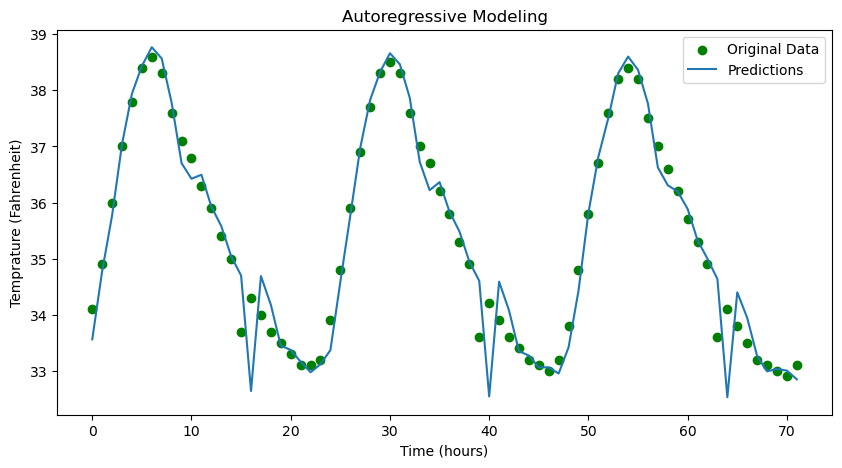

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data source: https://www.ncei.noaa.gov/cdo-web/search
# Read CSV file into pandas DataFrame
df = pd.read_csv('LGA_temp.csv') # Temperature at LGA airport for 2010 (12 months)
temp = df['HLY-TEMP-NORMAL'].to_numpy()

memory = 8
T = temp.size
N = T - memory

# Function to create the dataset for AR model
def create_data(data, M):
    X, y = [], []
    for i in range(M, len(data)):
        X.append(data[i-M:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Create lagged dataset
X_data, y_data = create_data(temp, memory)

theta, residual, rank, sing_val = np.linalg.lstsq(X_data, y_data, rcond=None)
y_pred = X_data @ theta

print("RMS error: ", np.sqrt(residual/N))
# Plot predictions
plot_hours = 24*3 # first 3 days of 2010
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(plot_hours), y_data[:plot_hours], color='green', label='Original Data')
plt.plot(y_pred[:plot_hours], label='Predictions')
plt.xlabel('Time (hours)')
plt.ylabel('Temprature (Fahrenheit)')
plt.title('Autoregressive Modeling')
plt.legend()
plt.show()

## Model Selection, Generalization, and Validation

This section is entirely **practical**: these are standard “tricks of the trade” that you will revisit in more detail in mae advanced classes on statistics and machine learning.

Our starting point is a philosophical question: what is the foul of a learned model? Perhaps surprisingly, it is **NOT TO PREDICT OUTCOMES FOR THE GIVEN DATA**; after all, we already have this data! Instead, we want to **predict the outcome on new, unseen data.**

If a model makes reasonable predictions on new unseen data, it is said to _generalize_. On the other hand, a model that makes poor predictions on new unseen data, but predicts the given data well, is said to be **over-fit.**

:::{note} Validation
A simple but effective methal to guess if a model will generalize is called _validation_. The idea is to split your original data into a training set and a test set. Typical splits used in practice are $80 \%/20\%$ and $90 \%/10\%$.
:::

Then, we **only** use the _training data_ to fit (or “train”) our model, and then evaluate the model’s performance on the **test set**. If the prediction errors on the training and test sets are similar, then we **guess the model will generalize**. This is rarely guaranteed, but such a comparison is often predictive of a model’s generalization properties.

Validation is often used for _model selection_, ie., to choose among different candidate models. For example, by comparing train/test errors, we can select between;

1. Polynomial models of different degrees.
2. Regression models with different sets of features
3. AR models with different memories.

::::{prf:example} Errors with Varying Degrees of Polynomial
Models are fit using a training set of 100 points, and the plots below show test set of 100 (green) points.

:::{figure}../figures/05-data_ls_eg_1.jpg
:label:data_ls_eg_1
:alt:Polynomial fit 100
:width: 400px
:align: center
:::

:::{figure}../figures/05-data_ls_eg_2.jpg
:label:data_ls_eg_2
:alt:RMS_degree
:width: 400px
:align: center
:::

[This plot](#data_ls_eg_2) shows train and test error (RMS standards for root mean square, and is the square root of [MMSE](#MMSE_defn)) vs. the degree of the polynomial being fit. Notice that despite train error decreasing monotonically, test error goes down and then increases as we start to over-fit. This plot suggests that pdynomials of degree 4,5, or 6 will generalize well while achieving a small error.

For more about validation and feature engineering, refer to VMLS Ch. 13.2 and 13.3. These are essential components of modern data science and machine learning.
::::

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikolaimatni/ese-2030/HEAD?labpath=/03_Ch_4_Orthogonality/056-least_squares_data.ipynb)